<a href="https://colab.research.google.com/github/NayeemHossenJim/Deep-Learning/blob/main/BSL_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import zipfile
import os

# Create a directory and unzip
zip_path = "Data.zip"
unzip_path = "/content/DATASET"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")


In [14]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

# Train the model
results = model.train(
    data='/content/Data/data.yaml',
    epochs=50,
    imgsz=640
)

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

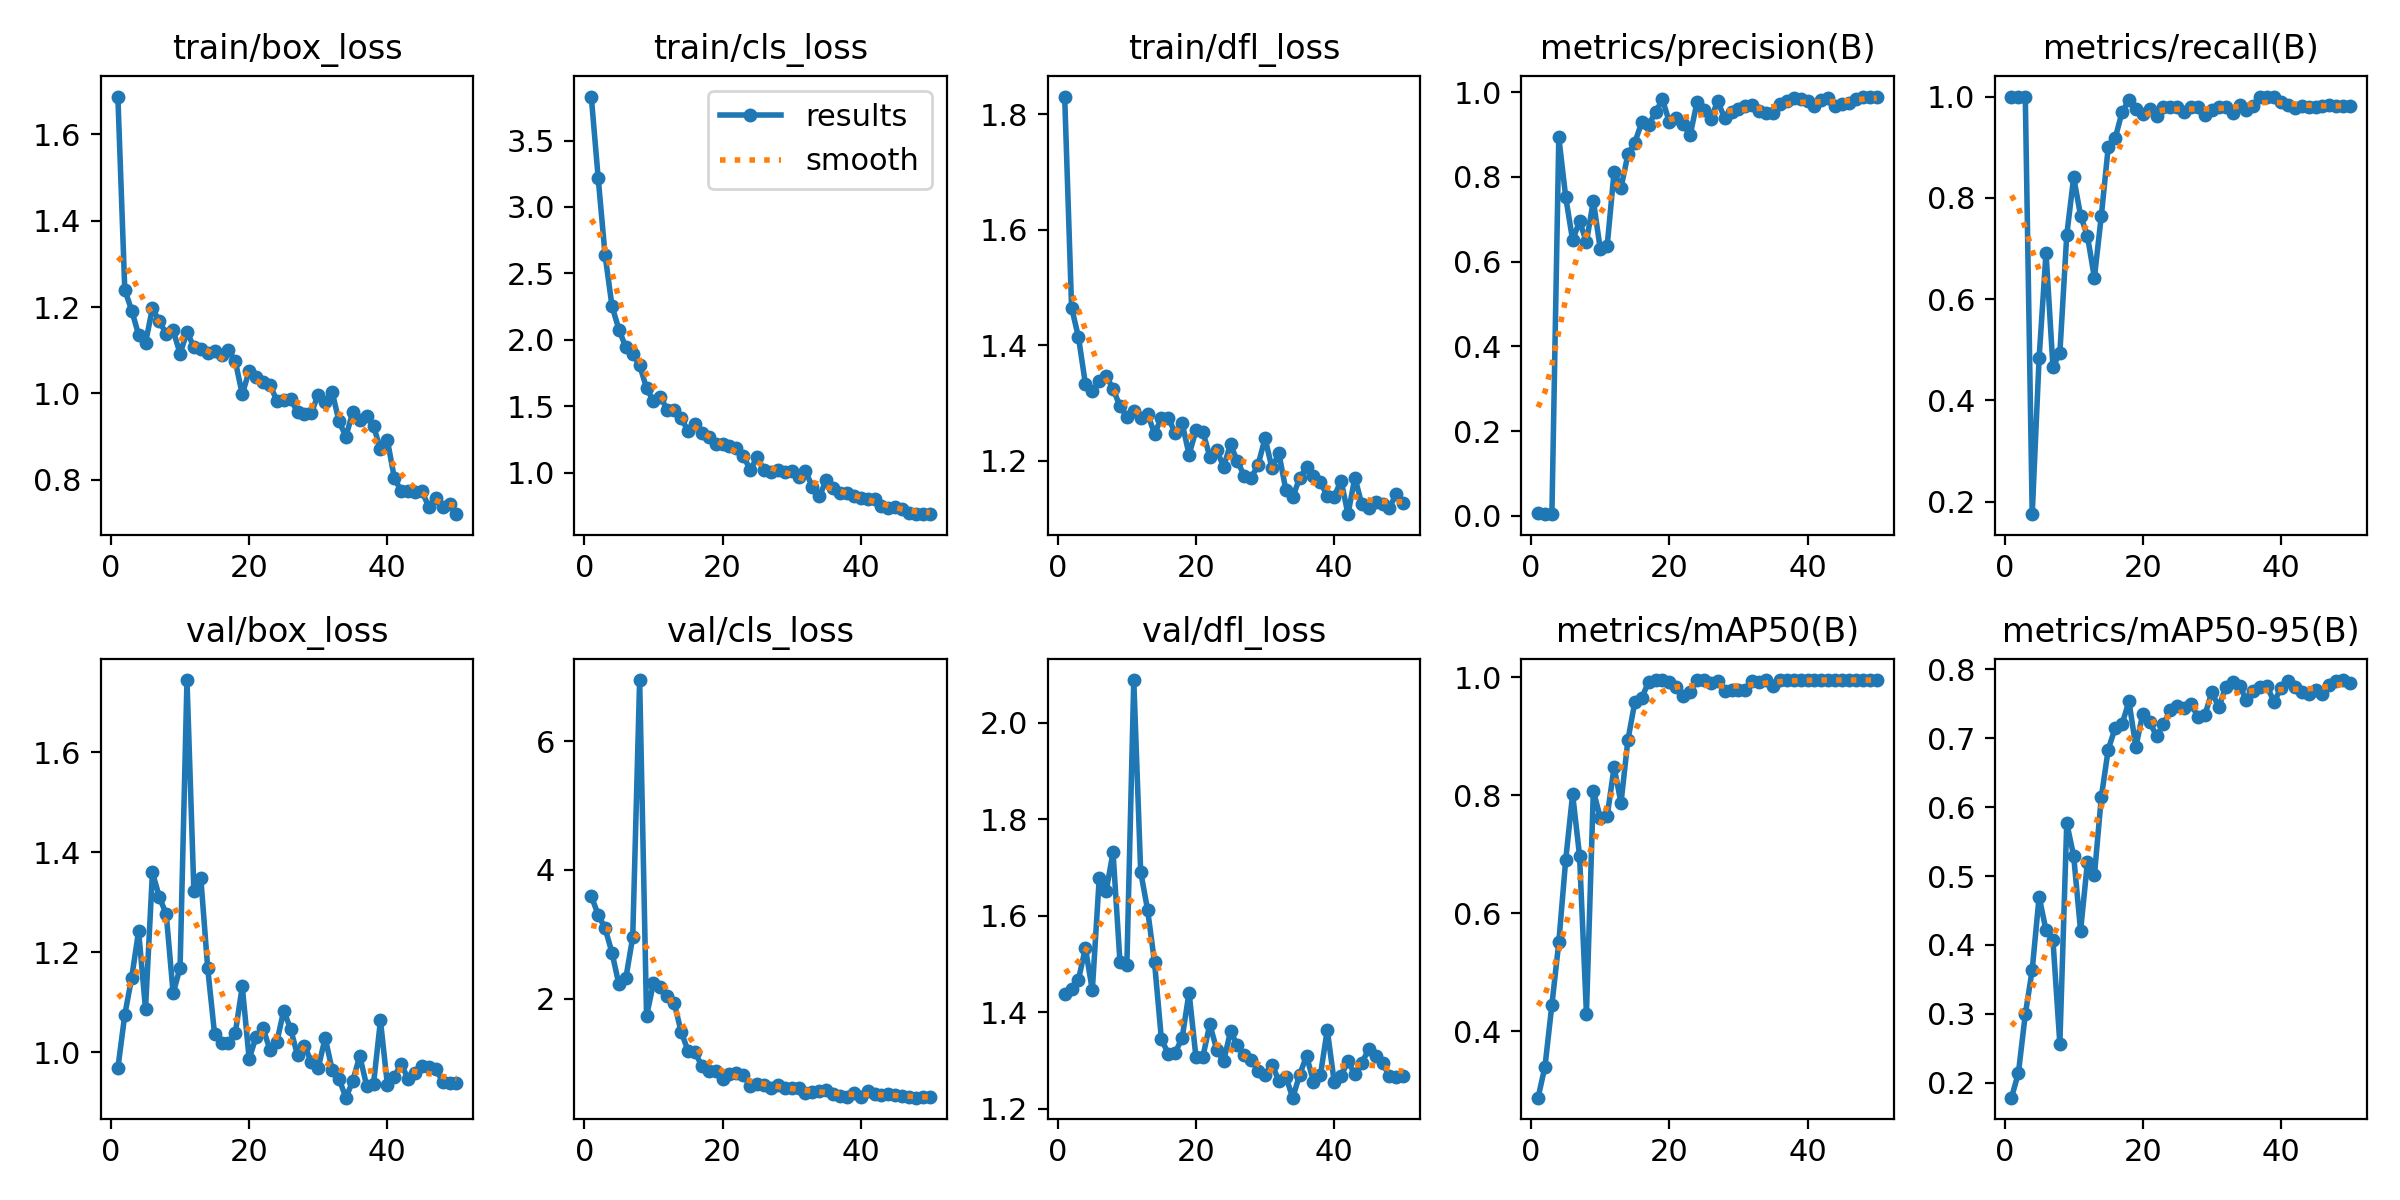

In [15]:
from IPython.display import Image, display

# Display training results
display(Image(filename='runs/detect/train/results.png'))


In [16]:
# Run inference
model.predict(source='/content/Data/test/images', save=True, conf=0.25)



image 1/5 /content/Data/test/images/IMG_20250623_140525_jpg.rf.481671542add3bea8d2995ef8adf5cfd.jpg: 640x640 1 E, 5.8ms
image 2/5 /content/Data/test/images/IMG_20250623_140556-2_jpg.rf.604c0a69b8194712093e1a04f894a26c.jpg: 640x640 1 A, 5.7ms
image 3/5 /content/Data/test/images/IMG_20250623_140754_jpg.rf.8812578ae9b99d60f329465564251435.jpg: 640x640 1 B, 5.7ms
image 4/5 /content/Data/test/images/IMG_20250623_141048_jpg.rf.6ee78cbc738f137d2a8749a8d0747b25.jpg: 640x640 1 A, 5.7ms
image 5/5 /content/Data/test/images/IMG_20250623_141828-2_jpg.rf.7ca9adaace8a4417532d702fecd3799d.jpg: 640x640 1 D, 5.7ms
Speed: 1.6ms preprocess, 5.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train32


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
 obb: None
 orig_img: array([[[ 96,  94,  93],
         [ 87,  85,  84],
         [ 79,  77,  76],
         ...,
         [220, 180, 161],
         [220, 180, 161],
         [220, 180, 161]],
 
        [[103,  99,  98],
         [ 92,  91,  87],
         [ 85,  81,  80],
         ...,
         [220, 180, 161],
         [220, 180, 161],
         [220, 180, 161]],
 
        [[ 97,  92,  89],
         [ 88,  85,  80],
         [ 82,  77,  74],
         ...,
         [220, 180, 161],
         [220, 180, 161],
         [220, 180, 161]],
 
        ...,
 
        [[208, 225, 238],
         [210, 227, 240],
         [205, 222, 235],
         ...,
         [173, 207, 223],
         [177, 211, 227],
         [178, 212, 228]],
 
        [[208, 225, 238],
         [206, 223, 236],
         [209, 226, 239],
     

In [17]:
# Run evaluation on the test set
metrics = model.val(data='/content/Data/data.yaml', split='test')


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 685.3±186.2 MB/s, size: 23.5 KB)
val: Scanning /content/Data/test/labels... 5 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5/5 1391.2it/s 0.0s
val: New cache created: /content/Data/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.2it/s 0.2s
                   all          5          5       0.97          1      0.995      0.763
                     A          3          3      0.999          1      0.995      0.697
                     B          1          1      0.949          1      0.995      0.895
                     D          1          1      0.963          1      0.995      0.697
Speed: 0.3ms preprocess, 29.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train33


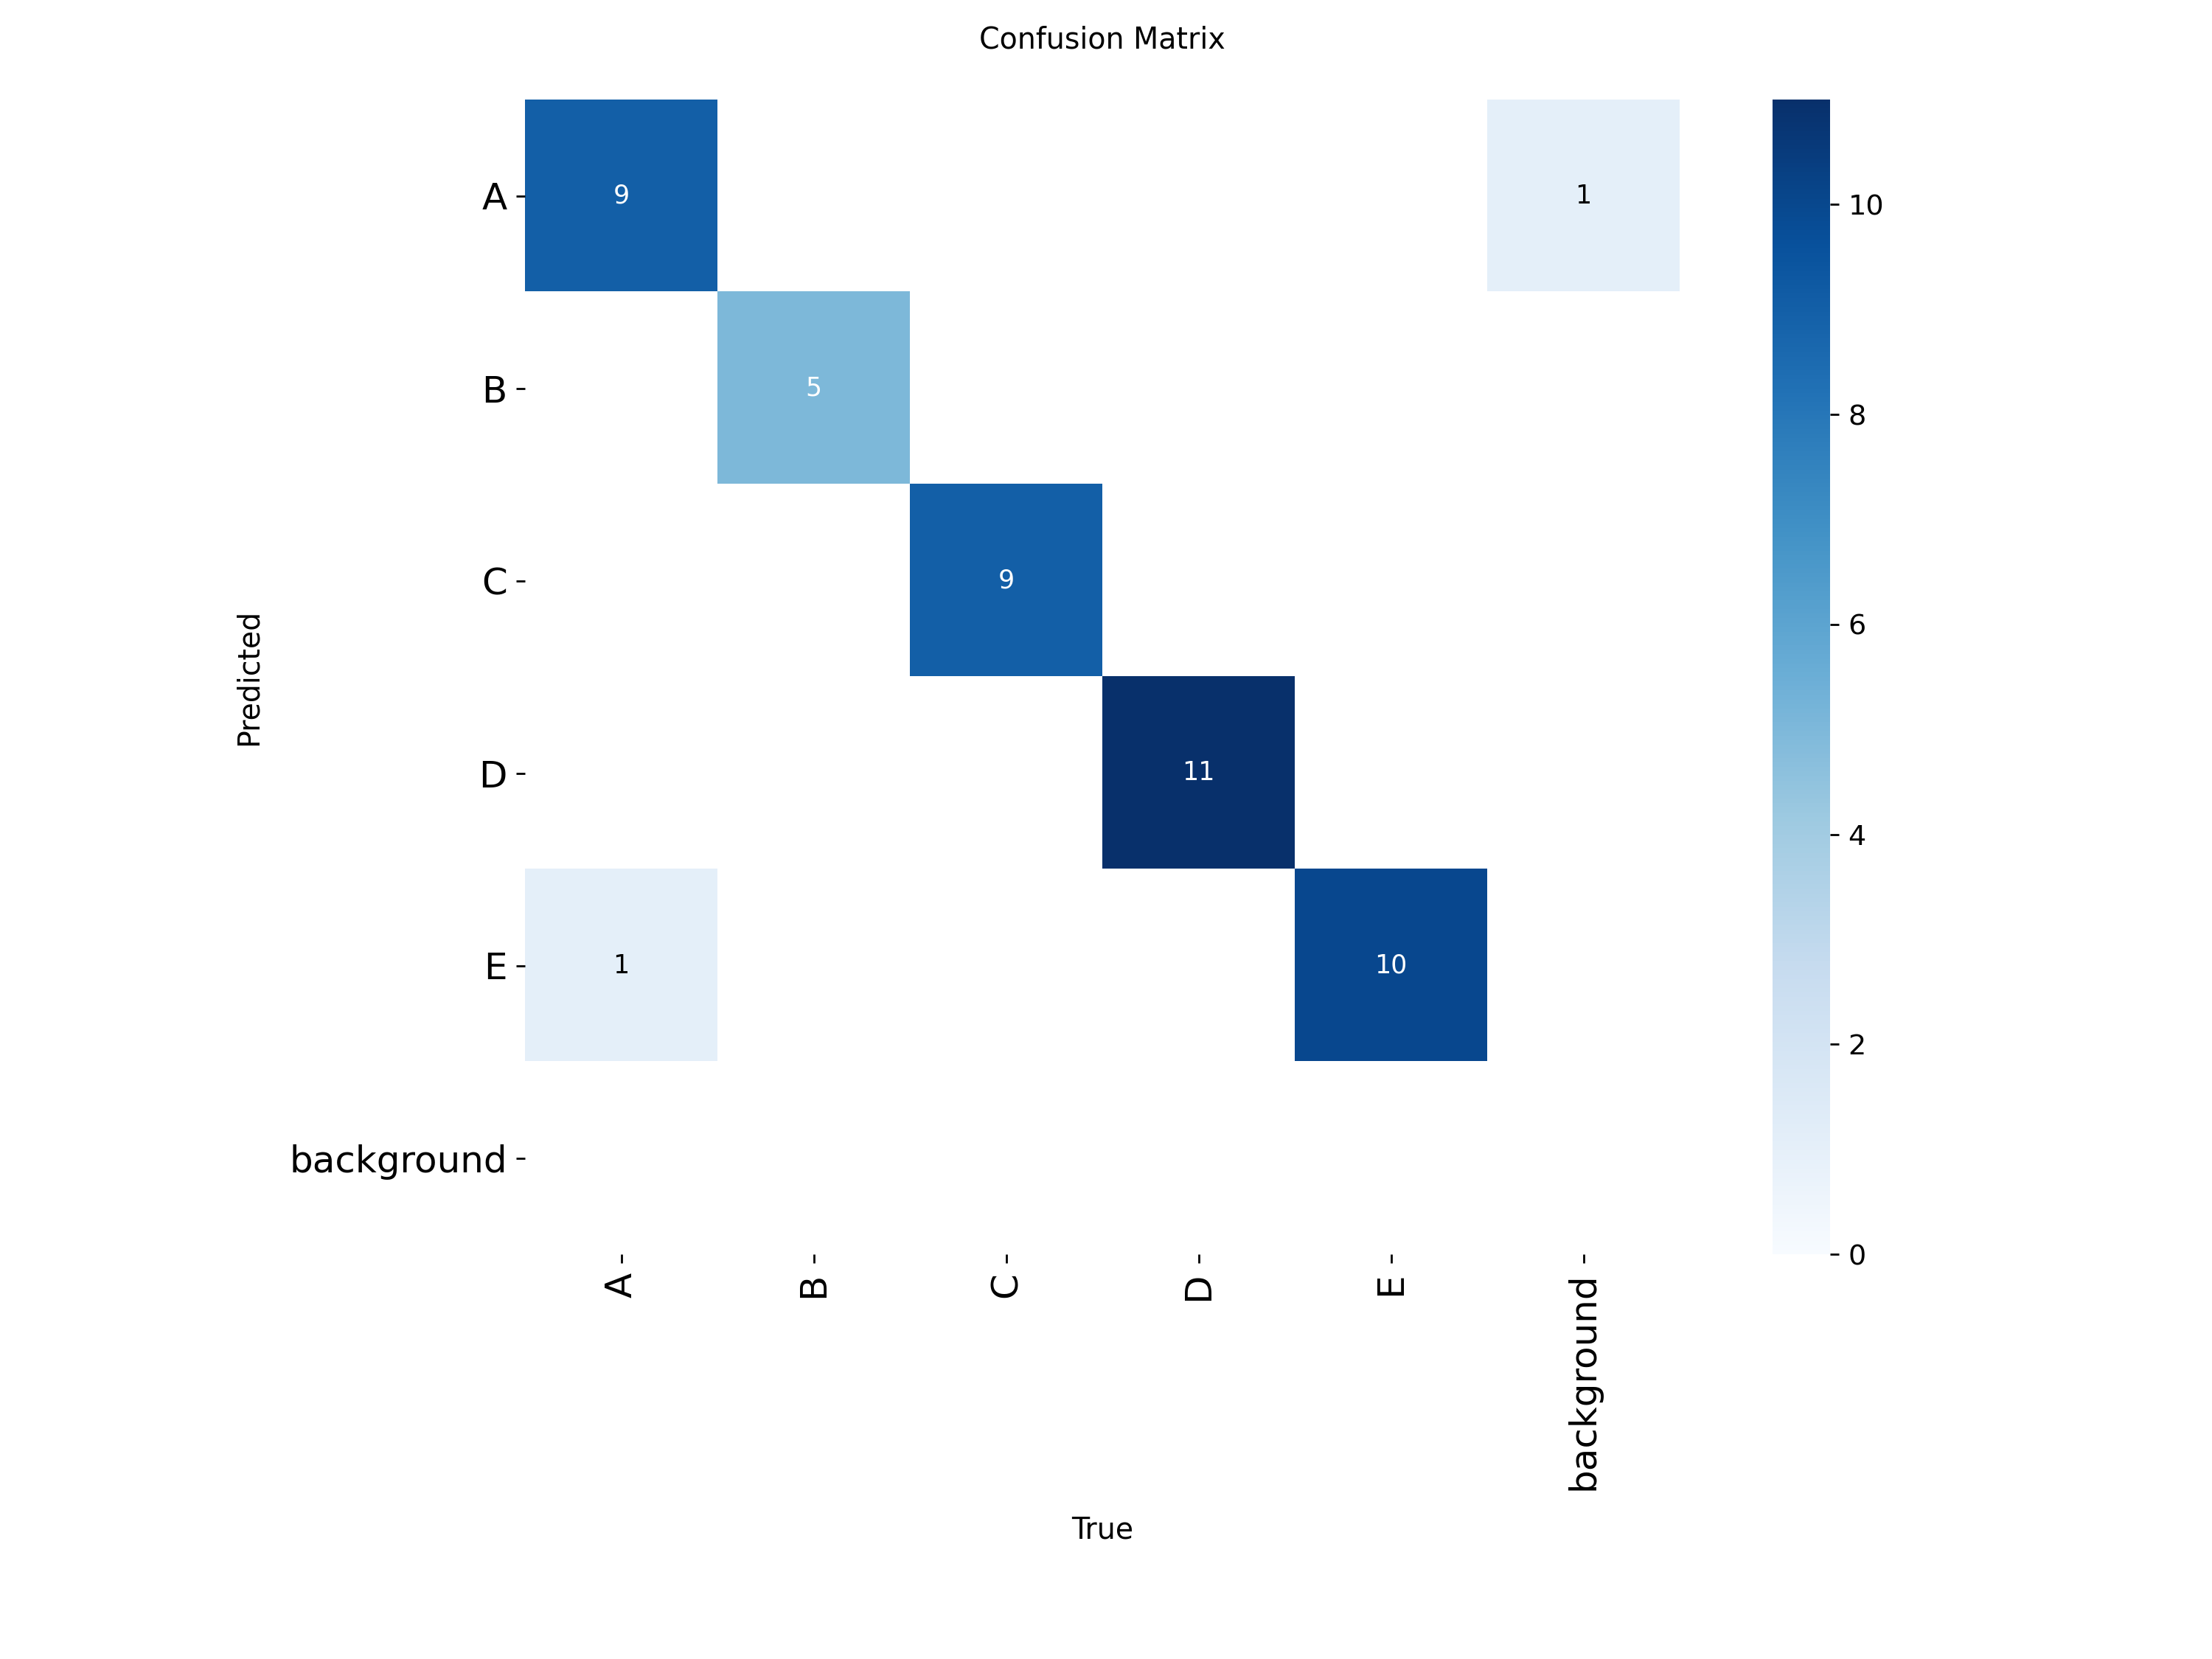

In [22]:
display(Image(filename='/content/runs/detect/train3/confusion_matrix.png'))
